## Preprocessed DATA

In [1]:
import pandas as pd

file_path = "dataset.xlsx"

ib_data = pd.read_excel(file_path, sheet_name="DATA IB")
ik_data = pd.read_excel(file_path, sheet_name="DATA IK")

# kolom yang relevan --> 'keperluan'
ib_data = ib_data[["desc"]].rename(columns={"desc": "keperluan"})
ik_data = ik_data[["tujuan"]].rename(columns={"tujuan": "keperluan"})

# add kolom penanda 'izin'
ib_data["izin"] = "IB"
ik_data["izin"] = "IK"

combined_data = pd.concat([ib_data, ik_data], ignore_index=True)

# Bersihkan teks pada kolom 'keperluan'
combined_data["keperluan"] = combined_data["keperluan"].str.strip().str.lower()

combined_data.to_csv("combined_ib_ik_keperluan.csv", index=False)

print(combined_data.head())


                 keperluan izin
0  ingin bertemu orang tua   IB
1  ingin bertemu orang tua   IB
2        libur akhir tahun   IB
3           libur semester   IB
4        bertemu orang tua   IB


In [2]:
import pandas as pd

# Muat data
file_path = "combined_ib_ik_keperluan.csv"
data = pd.read_csv(file_path)

# Tampilkan informasi data
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80366 entries, 0 to 80365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keperluan  80366 non-null  object
 1   izin       80366 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
                 keperluan izin
0  ingin bertemu orang tua   IB
1  ingin bertemu orang tua   IB
2        libur akhir tahun   IB
3           libur semester   IB
4        bertemu orang tua   IB


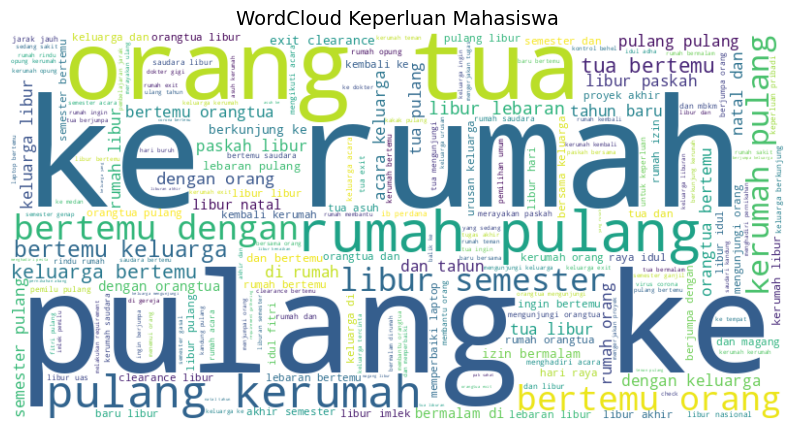

10 Kata Paling Umum dalam Keperluan:
pulang: 25158
rumah: 19215
ke: 18475
bertemu: 15071
libur: 14886
orang: 10994
tua: 10598
keluarga: 10439
kerumah: 9241
dan: 7372
dengan: 5415
semester: 4958
orangtua: 4349
di: 3142
lebaran: 2484
paskah: 2433
acara: 2111
tahun: 1919
bermalam: 1719
natal: 1713


In [3]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Hitung distribusi kata
all_keperluan = " ".join(data["keperluan"])
word_counts = Counter(all_keperluan.split())

# Tampilkan WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_keperluan)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud Keperluan Mahasiswa", fontsize=14)
plt.show()

# Tampilkan kata paling umum
common_words = word_counts.most_common(20)
print("10 Kata Paling Umum dalam Keperluan:")
for word, count in common_words:
    print(f"{word}: {count}")


In [4]:
import re

# Klasifikasi keperluan
def classify_keperluan(text):
    if re.search(r"(laptop|printer|buku|barang)", text):
        return "Membeli Barang"
    elif re.search(r"(orangtua|orang tua|keluarga|saudara|pulang|rumah|bertemu|libur|pemilu|ib|pesta|pernikahan|natal|lebaran|paskah|acara)", text):
        return "Bertemu Keluarga"
    elif re.search(r"(proyek|PKM|tugas|makalah|requirement|observasi|pa 1|pa 2| pa 3|tugas akhir|akhir)", text):
        return "Tugas Kuliah"
    elif re.search(r"(kontrol|gigi|behel|cabut|sakit)", text):
        return "Pergi ke Klinik"
    elif re.search(r"(atm|rekening|tabungan|kartu)", text):
        return "Mengurus Kartu Bank"
    elif re.search(r"(exit|clearance|wisuda)", text):
        return "Tamat Kuliah"
    else:
        return "Lainnya"

data["kategori"] = data["keperluan"].apply(classify_keperluan)

# Tampilkan hasil klasifikasi
print(data["kategori"].value_counts())

# Simpan hasil klasifikasi
data.to_csv("categorized_keperluan.csv", index=False)


kategori
Bertemu Keluarga       70516
Lainnya                 5931
Tamat Kuliah            1226
Membeli Barang           936
Tugas Kuliah             930
Pergi ke Klinik          670
Mengurus Kartu Bank      157
Name: count, dtype: int64


In [5]:
opp_data = pd.read_csv("categorized_keperluan.csv")
opp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80366 entries, 0 to 80365
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   keperluan  80366 non-null  object
 1   izin       80366 non-null  object
 2   kategori   80366 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Convert text into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(opp_data["keperluan"])
y = opp_data["kategori"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9980714196839616

Classification Report:
                      precision    recall  f1-score   support

   Bertemu Keluarga       1.00      1.00      1.00     14136
            Lainnya       0.99      0.99      0.99      1171
     Membeli Barang       1.00      0.99      0.99       159
Mengurus Kartu Bank       0.95      0.90      0.93        42
    Pergi ke Klinik       1.00      0.98      0.99       130
       Tamat Kuliah       1.00      1.00      1.00       239
       Tugas Kuliah       0.96      0.96      0.96       197

           accuracy                           1.00     16074
          macro avg       0.99      0.98      0.98     16074
       weighted avg       1.00      1.00      1.00     16074

